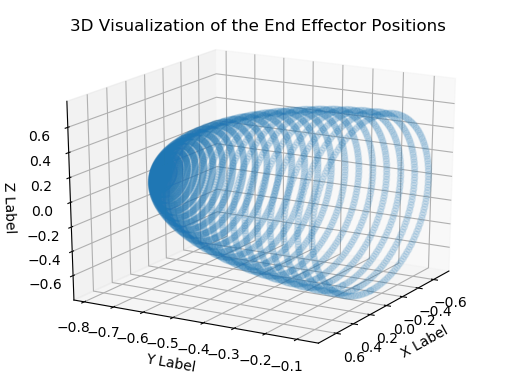

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from pytransform3d.urdf import UrdfTransformManager
 
csv_file_path = 'end_effector_positions_only2.csv'
 
x, y, z = [], [], []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x.append(float(row['x']))
        y.append(float(row['y']))
        z.append(float(row['z']))
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x, y, z, alpha=0.1)
 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
ax.set_title('3D Visualization of the End Effector Positions')

ax.set_xlim()

ax.view_init(elev=20, azim=30)
 
plt.show()

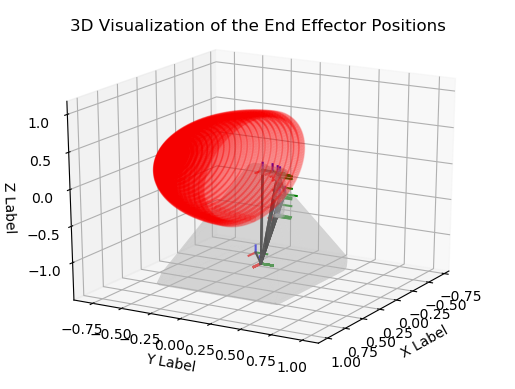

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from pytransform3d.urdf import UrdfTransformManager

# URDF 파일 로드
tm = UrdfTransformManager()

urdf_file_path = "/home/robros/catkin_ws/src/NewNew_description/urdf/model.urdf"
mesh_directory = "/home/robros/catkin_ws/src/NewNew_description/meshes"

tm = UrdfTransformManager()

with open(urdf_file_path, "r") as urdf_file:
    urdf_content = urdf_file.read()
    urdf_content = urdf_content.replace('package://NewNew_description/meshes', mesh_directory)
    tm.load_urdf(urdf_content, mesh_path=mesh_directory)

# CSV 파일에서 엔드 이펙터 위치 데이터 로드
csv_file_path = 'end_effector_positions_only2.csv'
x, y, z = [], [], []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x.append(float(row['x']))
        y.append(float(row['y']))
        z.append(float(row['z']))

# 시각화 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# URDF 모델 플롯
ax = tm.plot_frames_in("link1", s=0.1, ax=ax, show_name=False)  # 'base_link'는 시작 프레임, 필요에 따라 수정하세요.
ax = tm.plot_connections_in("link1", ax=ax)  # 'base_link'는 시작 프레임, 필요에 따라 수정하세요.
tm.plot_visuals("link1", ax=ax)  # 'base_link'는 시작 프레임, 필요에 따라 수정하세요.

# 엔드 이펙터 위치 플롯
ax.scatter(x, y, z, alpha=0.1, color='red')  # 엔드 이펙터 위치를 붉은 색으로 표시

# 축 레이블 및 타이틀 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Visualization of the End Effector Positions')

# 보기 각도 설정
ax.view_init(elev=20, azim=30)

plt.show()


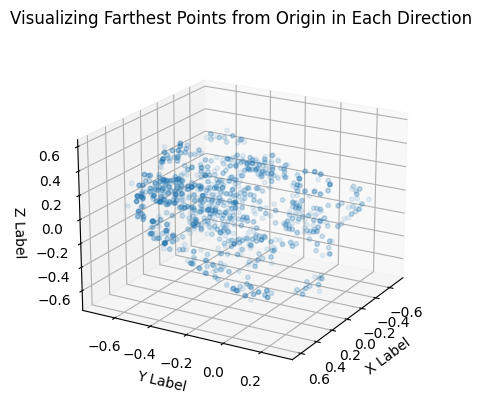

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
 
# CSV 파일 경로
csv_file_path = 'end_effector_positions.csv'
 
# CSV 파일에서 데이터 읽기
data = []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # 헤더 건너뛰기
    for row in reader:
        data.append([float(row[i]) for i in range(1, 4)])  # joint_angles를 제외한 x, y, z만 읽기
 
# 원점으로부터의 거리와 방향을 기준으로 최대 거리의 점을 선택
def select_farthest_points(data):
    normalized = {}
    for x, y, z in data:
        direction = np.array([x, y, z]) / np.linalg.norm([x, y, z])  # 방향 벡터 정규화
        key = tuple(direction)  # 딕셔너리 키로 사용 가능하도록 튜플 변환
        distance = np.linalg.norm([x, y, z])
        if key not in normalized or distance > normalized[key][3]:
            normalized[key] = [x, y, z, distance]
 
    return [value[:3] for value in normalized.values()]
 
# 최대 거리의 점들 선택
selected_points = select_farthest_points(data)
 
# 무작위로 선택된 데이터로부터 x, y, z 좌표 분리
x, y, z = zip(*selected_points)
 
# 3D 그래프 준비
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
# 데이터로 3D 산점도 플롯 생성
ax.scatter(x, y, z, alpha=0.1, s=10)
 
# 라벨 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
# 제목 설정
ax.set_title('Visualizing Farthest Points from Origin in Each Direction')

ax.view_init(elev=20, azim=30)
# 플롯 표시
plt.show()

In [3]:
import numpy as np
 
# 조인트 각도의 범위 설정
angle_ranges = [
    (-2.09, 1.57),
    (-2.09, 0),
    (-1.57, 1.57),
    (0, 2.09),
    (-1.57, 1.57),
    (-1.04, 1.04),
    (-1.04, 1.04),
]
 
# 범위에 따른 num 값을 계산하는 함수
def calculate_num_values(range_min, range_max, min_points=3, max_points=10):
    range_size = range_max - range_min
    # 전체 가능한 범위 (여기서는 -2.09에서 2.09로 가정)
    full_range_size = 2.09 + 2.09
    # 범위 크기에 비례하여 num 값을 계산
    num = int(min_points + (range_size / full_range_size) * (max_points - min_points))
    return max(min_points, min(num, max_points))  # 최소 및 최대 제한 적용
 
# 각 조인트의 범위를 기반으로 linspace 매개변수 설정
linspace_parameters = [
    np.linspace(start, end, num=calculate_num_values(start, end))
    for start, end in angle_ranges
]
 
# linspace 매개변수 출력 (디버깅용)
for params in linspace_parameters:
    print(len(params))

[-2.09   -1.6325 -1.175  -0.7175 -0.26    0.1975  0.655   1.1125  1.57  ]
[-2.09  -1.672 -1.254 -0.836 -0.418  0.   ]
[-1.57       -1.12142857 -0.67285714 -0.22428571  0.22428571  0.67285714
  1.12142857  1.57      ]
[0.    0.418 0.836 1.254 1.672 2.09 ]
[-1.57       -1.12142857 -0.67285714 -0.22428571  0.22428571  0.67285714
  1.12142857  1.57      ]
[-1.04  -0.624 -0.208  0.208  0.624  1.04 ]
[-1.04  -0.624 -0.208  0.208  0.624  1.04 ]
